## **My Dashboard Data Wrangling**

In [2]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported successful")

Imported successful


In [6]:
# Loading in the dataset
sales_data = pd.read_excel("eletronic_sales.xlsx")

In [7]:
#  Snapshot of the dataset
sales_data.head()

,Date,Branch,Sales Agent,Products,Units,Price
0,2014-09-01,Woji,Chinedu,Apple,2,125.00
1,2015-06-17,Woji,Emeka,Apple,5,125.00
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29
3,2015-11-17,Woji,Tolu,HP,11,4.99
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29


In [43]:
#  Little of Feature Engineering

# Trying to make a copy of the dataset and work on it
sales_data2 = sales_data.copy()

# sales_data2["Revenue"] = sales_data2["Units"] * sales_data2["Price"]

#  round(parameter, 2)
sales_data2["Revenue(N)"] = round(sales_data2["Units"]*sales_data2["Price"] * 1000, 2)

# This is to view if the changes has been effected
sales_data2.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue(N)
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0
3,2015-11-17,Woji,Tolu,HP,11,4.99,54890.0
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18060.0


In [44]:
# Let's check data types
sales_data2.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
Revenue(N)            float64
dtype: object

In [ ]:
#  Converting the date column to date time
# By using "pd.to_datetime()" function

# Note: we only do this when trying to convert it to datetime if not there earlier
sales_data2["Date"] = pd.to_datetime(sales_data2["Date"])

In [45]:
sales_data2.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
Revenue(N)            float64
dtype: object

<Axes: xlabel='Data Types', ylabel='Count'>

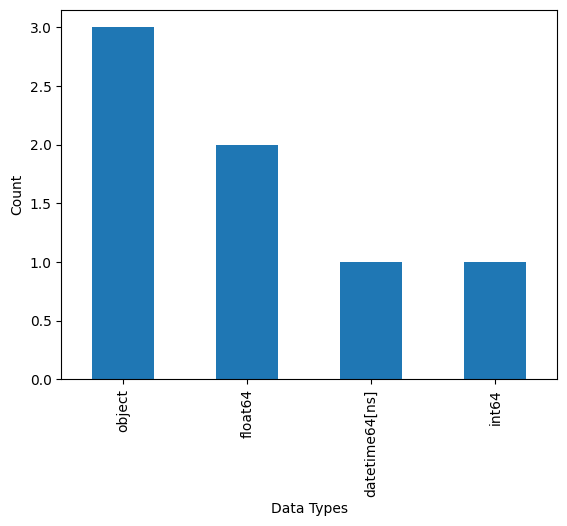

In [46]:
# Trying to plot the datatype.
sales_data2.dtypes.value_counts().plot(kind='bar', xlabel = "Data Types", ylabel = "Count")

In [47]:
# lets  work on our datetime to extract the month,year and week name
# using ".dt.year",".dt.month_name()",".day_name()

sales_data2["Year"] = sales_data2["Date"].dt.year
sales_data2["Month"] = sales_data2["Date"].dt.month_name()
sales_data2["Week"] = sales_data2["Date"].dt.day_name()

In [48]:
sales_data2.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue(N),Year,Month,Week
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0,2014,September,Monday
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0,2015,June,Wednesday
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0,2015,September,Thursday
3,2015-11-17,Woji,Tolu,HP,11,4.99,54890.0,2015,November,Tuesday
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18060.0,2015,October,Saturday


### **Working on the KPI's (Key Performance index of the data)**
1. Total units sold
2. Total Revenue
3. Average Revenue per unit
4. Numbers of products
5. Numbers of Sales Agents

In [49]:
# Total Units sold

Total_goods_sold = sales_data2["Units"].sum()
print(f"Total goods sold: {Total_goods_sold} units")

Total goods sold: 2121 units


In [50]:
# Total Revenue
Total_Revenue = sales_data2["Revenue(N)"].sum()
print(f"Total Revenue: N{Total_Revenue}")

Total Revenue: N19627880.0


In [51]:
#  Average Revenue per unit
# using "round() function to approximate to 2 decimal place"
Average_revenue_per_unit = round(Total_Revenue / Total_goods_sold,2)
print(f"Average Revenue per unit: N{Average_revenue_per_unit}")

Average Revenue per unit: N9254.07


In [53]:
#4. Numbers of products
## using the .nunique() shows the numbers of unique values
Numbers_of_products = sales_data2["Products"].nunique()
print(f"Numbers of products: {Numbers_of_products}")

Numbers of products: 5


In [56]:
# Numbers of Sales Agents
Numbers_of_sales_agents = sales_data2["Sales Agent"].nunique()
print(f"Numbers of Sales Agents: {Numbers_of_sales_agents}")

Numbers of Sales Agents: 11
